In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# read data
df = pd.read_csv(r'C:\Users\bhat1\Downloads\wine.csv')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3799,6.4,0.240,0.23,7.3,0.069,31.0,157.0,0.99620,3.25,0.53,9.1,5,white
5861,6.9,0.520,0.54,7.9,0.036,23.0,169.0,0.99267,3.26,0.47,12.2,6,white
3816,8.1,0.250,0.38,3.8,0.051,18.0,129.0,0.99280,3.21,0.38,11.5,6,white
4759,6.5,0.340,0.46,1.0,0.023,6.0,80.0,0.98865,3.15,0.54,12.9,6,white
526,7.3,0.365,0.49,2.5,0.088,39.0,106.0,0.99660,3.36,0.78,11.0,5,red


In [3]:
# EDA

In [4]:
df.shape

(6497, 13)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [9]:
# label Encoding
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

In [10]:
# Splitting Features and labels

In [11]:
x = df.drop(df.columns[-1],axis=1)
y = df['type']

In [12]:
y.value_counts()

type
1    4898
0    1599
Name: count, dtype: int64

In [13]:
# Scaling the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = x.columns

In [14]:
X_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [16]:
# KNN Classification

In [17]:
# Set the number of neighbors for KNN
K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(x_train, y_train)  # Fit the model

KNeighborsClassifier(n_neighbors=3)

Confusion Matrix:
 [[ 380   23]
 [ 115 1107]]


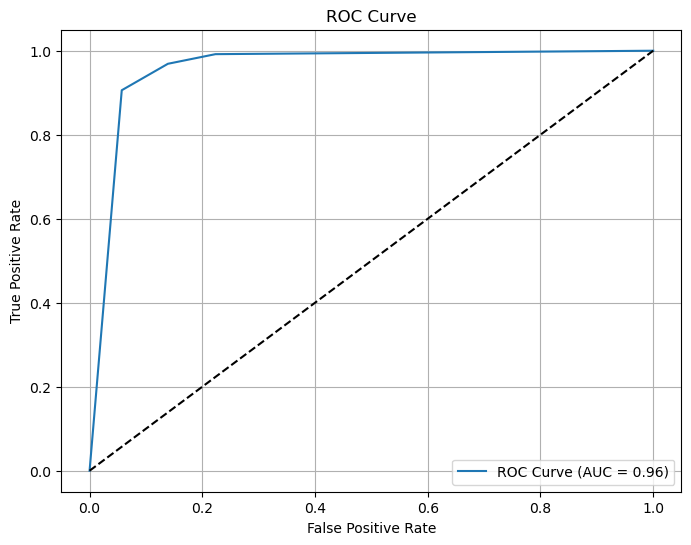

Best Threshold: 1.0
Confusion Matrix with Best Threshold:
 [[ 380   23]
 [ 115 1107]]


In [18]:
# Set initial threshold
threshold = 0.8

train_proba = model.predict_proba(x_train)[:, 1]
y_train_pred = (train_proba >= threshold).astype(int)


test_proba = model.predict_proba(x_test)[:, 1]
y_test_pred = (test_proba >= threshold).astype(int)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate TPR, FPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test, test_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fprs, tprs, label='ROC Curve (AUC = {:.2f})'.format(auc(fprs, tprs)))
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on TPR - FPR
best_threshold_index = np.argmax(tprs - fprs)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

# Predict using the best threshold
y_test_best_pred = (test_proba >= best_threshold).astype(int)
best_conf_matrix = confusion_matrix(y_test, y_test_best_pred)

print("Confusion Matrix with Best Threshold:\n", best_conf_matrix)

In [19]:
# Decision Tree

In [20]:
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
y_prob = dt_classifier.predict_proba(x_test)[:, 1]  

In [22]:
# apply threshold
threshold = 0.82
y_pred_threshold = np.where(y_prob >= threshold, 1, 0)

In [23]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred_threshold)
print(f'Accuracy with threshold {threshold}: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_threshold)
print('\nConfusion Matrix with threshold:')
print(conf_matrix)

# Classification Report
print('\nClassification Report with threshold:')
print(classification_report(y_test, y_pred_threshold))

Accuracy with threshold 0.82: 96.55%

Confusion Matrix with threshold:
[[ 368   35]
 [  21 1201]]

Classification Report with threshold:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       403
           1       0.97      0.98      0.98      1222

    accuracy                           0.97      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.97      0.97      0.97      1625



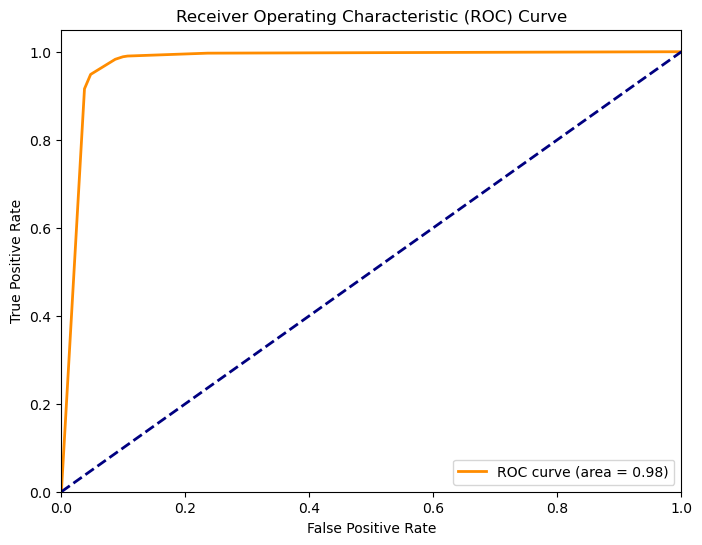

Best Threshold: 0.9918080748976009
Confusion Matrix with Best Threshold:
 [[ 380   23]
 [ 115 1107]]


In [24]:
# Calculate TPR, FPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test, test_proba)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Find the best threshold based on TPR - FPR
best_threshold_index = np.argmax(tprs - fprs)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

# Predict using the best threshold
y_test_best_pred = (test_proba >= best_threshold).astype(int)
best_conf_matrix = confusion_matrix(y_test, y_test_best_pred)

print("Confusion Matrix with Best Threshold:\n", best_conf_matrix)

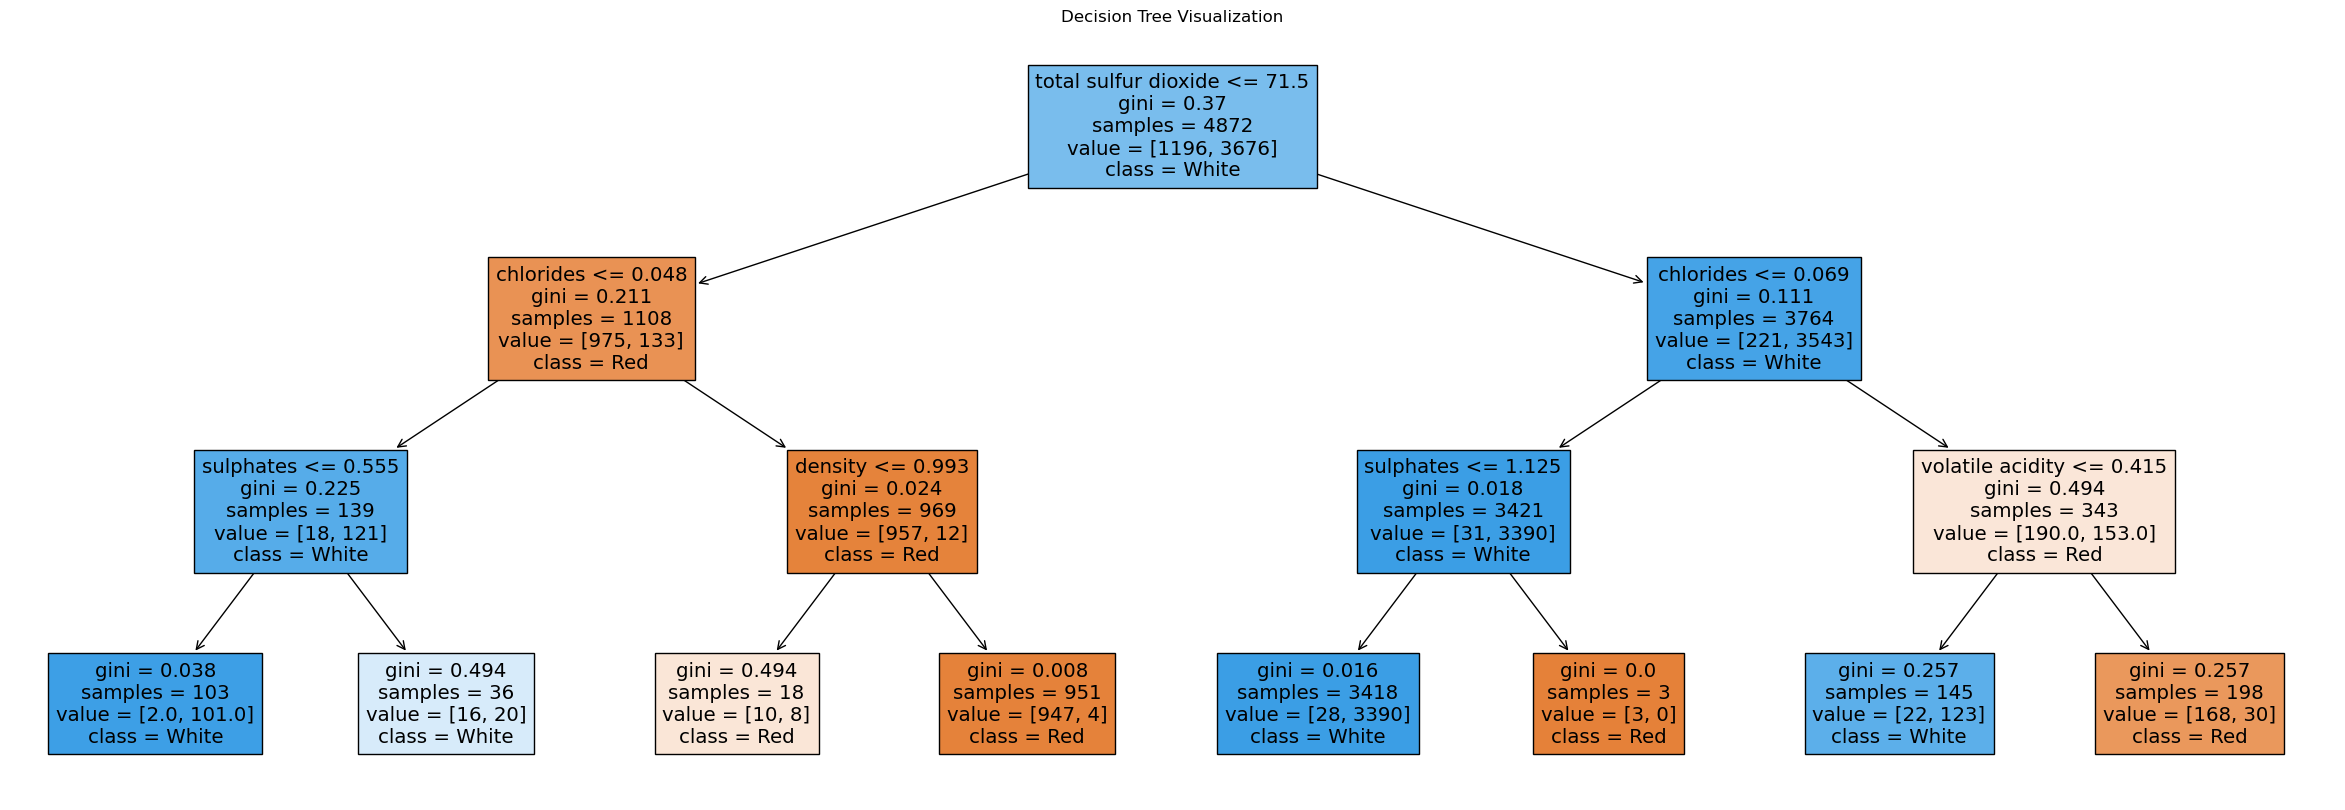

In [98]:
# Visualize Decision Tree
plt.figure(figsize=(30,10))
tree.plot_tree(dt_classifier, feature_names=x.columns,class_names= ['Red','White'] ,filled=True)
plt.title('Decision Tree Visualization')
plt.show()

In [85]:
# Logistic Regression

In [87]:
# Initialize and Train the Logistic Regression Model
log_reg_classifier = LogisticRegression(random_state=42)
log_reg_classifier.fit(x_train, y_train)

C:\Users\bhat1\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [89]:
# Make Predictions (with probability for custom threshold)
y_prob_log_reg = log_reg_classifier.predict_proba(x_test)[:, 1]  

In [91]:
# Apply initial threshold
threshold = 0.33
y_pred_threshold_log_reg = np.where(y_prob_log_reg >= threshold, 1, 0)

In [93]:
#Evaluate the Logistic Regression Model with custom threshold
# Accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_threshold_log_reg)
print(f'Accuracy with threshold {threshold} (Logistic Regression): {accuracy_log_reg * 100:.2f}%')

# Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_threshold_log_reg)
print('\nConfusion Matrix with threshold (Logistic Regression):')
print(conf_matrix_log_reg)

# Classification Report
print('\nClassification Report with threshold (Logistic Regression):')
print(classification_report(y_test, y_pred_threshold_log_reg))

Accuracy with threshold 0.33 (Logistic Regression): 97.29%

Confusion Matrix with threshold (Logistic Regression):
[[ 365   38]
 [   6 1216]]

Classification Report with threshold (Logistic Regression):
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       403
           1       0.97      1.00      0.98      1222

    accuracy                           0.97      1625
   macro avg       0.98      0.95      0.96      1625
weighted avg       0.97      0.97      0.97      1625



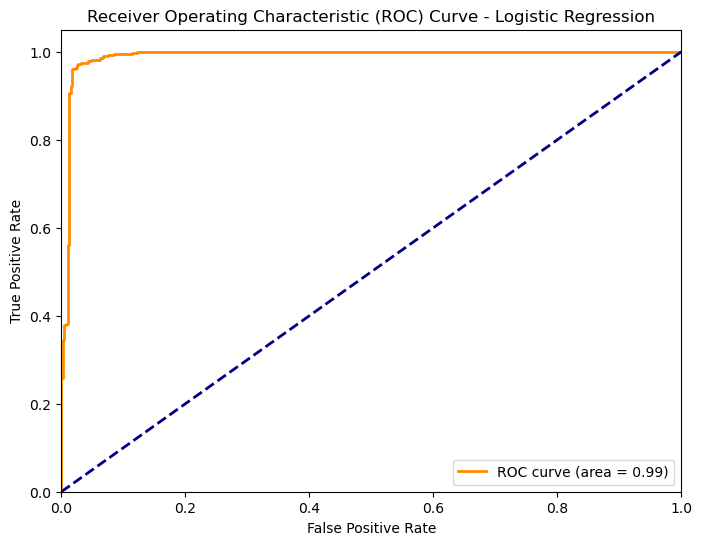

Best Threshold: 1.0
Confusion Matrix with Best Threshold:
 [[ 380   23]
 [ 115 1107]]


In [95]:
# Calculate TPR, FPR, and thresholds
fprs, tprs, thresholds = roc_curve(y_test, test_proba)

fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_prob_log_reg) 
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

plt.figure(figsize=(8,6))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Find the best threshold based on TPR - FPR
best_threshold_index = np.argmax(tprs - fprs)
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

# Predict using the best threshold
y_test_best_pred = (test_proba >= best_threshold).astype(int)
best_conf_matrix = confusion_matrix(y_test, y_test_best_pred)

print("Confusion Matrix with Best Threshold:\n", best_conf_matrix)
